In [181]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # Plots
import matplotlib.pyplot as plt # Plots
from sklearn import datasets
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [182]:
data = pd.read_csv('master.csv')
#einlesen der Datei

In [183]:
display(data)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.710000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.190000,Albania1987,NaN,"2,15,66,24,900",796.000000,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.830000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.590000,Albania1987,NaN,"2,15,66,24,900",796.000000,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.280000,Albania1987,NaN,"2,15,66,24,900",796.000000,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,Ukraine2017,0.785458,1.12E+11,2638.326055,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,United Kingdom2017,0.914735,2.70E+12,40857.755580,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,United States of America2017,0.918620,1.95E+13,60109.655730,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,Uruguay2017,0.816745,64233966861,18690.893840,G.I. Generation


In [184]:
print(data.columns)
#Spaltenname 

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [186]:
data.shape
#Zeilen- und Spaltenzahl

(31756, 12)

In [187]:
print(data.isnull().sum())
#Anzahl der fehlenden oder Null Werte

country                   0
year                      0
sex                       0
age                       0
suicides_no            1200
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


<Axes: >

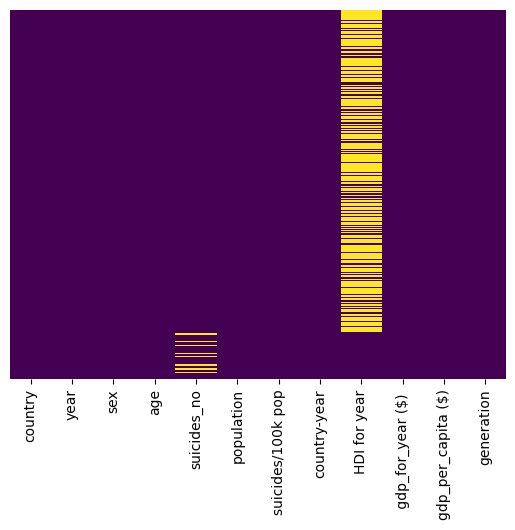

In [188]:
sns.heatmap(data.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')
#fehlende Werte als graphische Darstellung

In [189]:
dataclean = data.drop(columns = ['gdp_per_capita ($)'])
dataclean = dataclean.drop(columns = ['HDI for year'])
dataclean = dataclean.drop(columns = ['country-year'])
# HDI,GDP von der Hauptstadt, und Variable mit Land+Jahr raus

In [190]:
dataclean = dataclean.rename(columns= {' gdp_for_year ($) ': 'gdp_for_year ($)'})
#Zeile vom järhlichen GDP umbennenn

In [191]:
dataclean['country'].replace('United States', 'United States of America', inplace=True)
# alle Werte der USA werden bis 2015 als United States betitelt und danach als United States of America
# deswegen alle Werte der USA gleich betiteln mit 'United States of America'

In [192]:
dataclean = dataclean.dropna()
dataclean['gdp_for_year ($)'] = dataclean['gdp_for_year ($)'].str.replace(',', '')
#unnötige und falsch gesetze Kommas beim GDP entfernen 

In [193]:
dataclean['gdp_for_year ($)'] = dataclean['gdp_for_year ($)'].astype(float)
#gdp Daten umgewandelt 

In [194]:
display(dataclean)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.710000,2.156625e+09,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.190000,2.156625e+09,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.830000,2.156625e+09,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.590000,2.156625e+09,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.280000,2.156625e+09,Boomers
...,...,...,...,...,...,...,...,...,...
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,1.120000e+11,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,2.700000e+12,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,1.950000e+13,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,6.423397e+10,G.I. Generation


In [195]:
print(dataclean.columns)
#Name der spalten

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_for_year ($)', 'generation'],
      dtype='object')


In [196]:
dataclean.shape 
#zeilen,spalten

(30556, 9)

In [197]:
print(dataclean.isnull().sum())
# Null-Werte des bereinigten Datensatz (Kontrolle)

country              0
year                 0
sex                  0
age                  0
suicides_no          0
population           0
suicides/100k pop    0
gdp_for_year ($)     0
generation           0
dtype: int64


<Axes: >

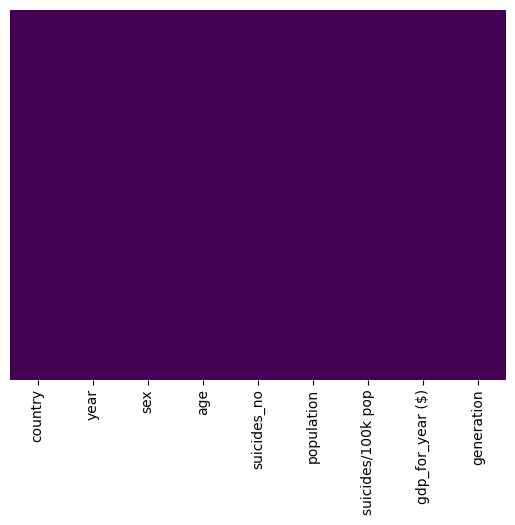

In [198]:
sns.heatmap(dataclean.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')
#fehlende Nullwerte graphsich (Kontrolle)

In [199]:
dataclean.describe()

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($)
count,30556.000000,30556.000000,3.055600e+04,30556.000000,3.055600e+04
mean,2002.766854,237.136242,4.990492e+06,12.176806,5.437237e+11
std,9.408922,867.956107,3.352492e+07,21.883165,2.353760e+12
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07
25%,1995.000000,3.000000,1.198480e+05,0.553214,1.017287e+10
50%,2003.000000,25.000000,5.148010e+05,4.790000,5.385106e+10
75%,2010.000000,132.000000,2.401046e+06,15.150000,2.760000e+11
max,2020.000000,22338.000000,1.396215e+09,515.092734,5.100000e+13


In [200]:
datanummeric = dataclean.select_dtypes(include=['number'])
corr = datanummeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($)
year,1.000000,-0.013955,0.152605,-0.075636,0.116055
suicides_no,-0.013955,1.000000,0.099528,0.270322,0.290381
population,0.152605,0.099528,1.000000,-0.050510,0.281185
suicides/100k pop,-0.075636,0.270322,-0.050510,1.000000,0.299586
gdp_for_year ($),0.116055,0.290381,0.281185,0.299586,1.000000


,country,suicides_no
0,Albania,1970.0
1,Antigua and Barbuda,11.0
2,Argentina,91931.0
3,Armenia,2057.0
4,Aruba,101.0
...,...,...
108,United Arab Emirates,622.0
109,United Kingdom,152238.0
110,United States of America,1095226.0
111,Uruguay,15258.0


Text(0, 0.5, 'Anzahl')

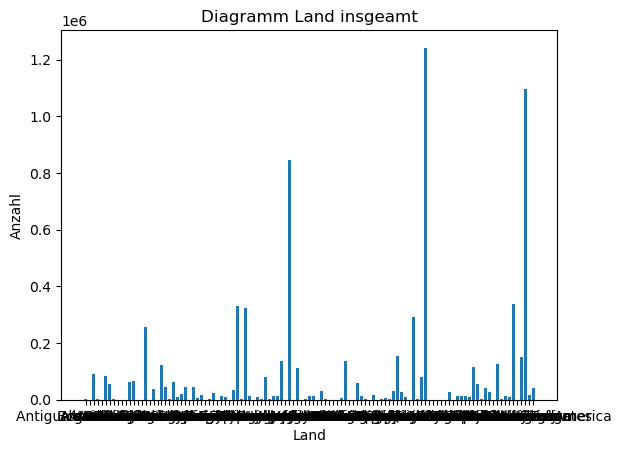

In [201]:
country_no = dataclean.groupby('country')['suicides_no'].sum().reset_index()
display(country_no)
plt.bar(country_no['country'], country_no['suicides_no'])
plt.title('Diagramm Land insgeamt')
plt.xlabel('Land')
plt.ylabel('Anzahl')
#Anzahl der Suizide Gesamt pro Land von 1985 bis 2021 summiert

In [202]:
population_no = dataclean.groupby('country')['population'].sum().reset_index()
display(population_no)
# Kontrolle, das Suicide pro 100k übereinstimmen (Suizide insgesamt/Poulation)

,country,population
0,Albania,62325467
1,Antigua and Barbuda,3083656
2,Argentina,2637721731
3,Armenia,179457157
4,Aruba,1259677
...,...,...
108,United Arab Emirates,36502275
109,United Kingdom,4131034140
110,United States of America,23795523521
111,Uruguay,207400755


,country,suicides/100k pop
0,Albania,924.760000
1,Antigua and Barbuda,179.140000
2,Argentina,3916.418210
3,Armenia,981.570023
4,Aruba,1596.520000
...,...,...
108,United Arab Emirates,94.890000
109,United Kingdom,2814.133843
110,United States of America,5159.641541
111,Uruguay,6600.840921


Text(0, 0.5, 'Anzahl')

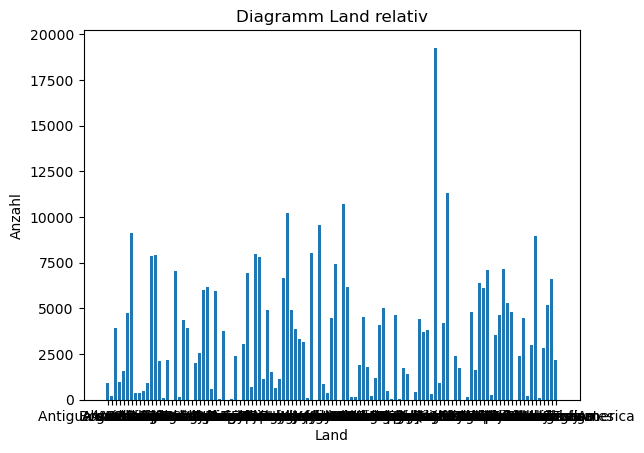

In [203]:
country2_no = dataclean.groupby('country')['suicides/100k pop'].sum().reset_index()
display(country2_no)
plt.bar(country2_no['country'], country2_no['suicides/100k pop'])
plt.title('Diagramm Land relativ')
plt.xlabel('Land')
plt.ylabel('Anzahl')
# Suicide pro 100k des Landes -> Suizide relativ und nicht total (aussagekräftiger)

,age,suicides_no
0,15-24 years,881090.0
1,25-34 years,1208715.0
2,35-54 years,2597691.0
3,5-14 years,59838.0
4,55-74 years,1780029.0
5,75+ years,718572.0


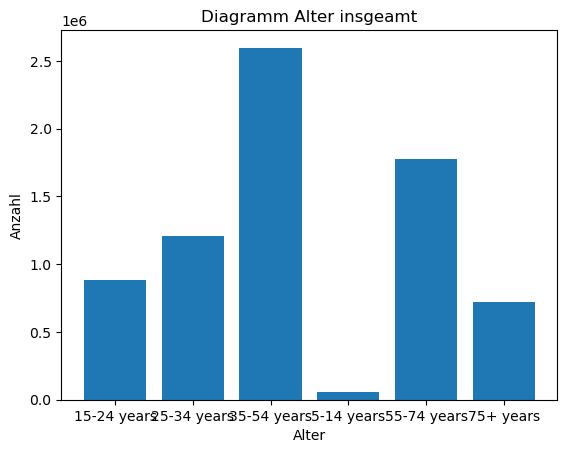

In [204]:
age_no = dataclean.groupby('age')['suicides_no'].sum().reset_index()
display(age_no)
plt.bar(age_no['age'], age_no['suicides_no'])
plt.title('Diagramm Alter insgeamt')
plt.xlabel('Alter')
plt.ylabel('Anzahl')
plt.show()
# Altersgruppen insgesamt 

,sex,suicides_no
0,female,1705078.0
1,male,5540857.0


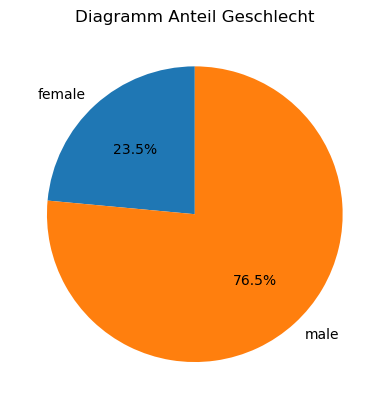

In [205]:
sex_no = dataclean.groupby('sex')['suicides_no'].sum().reset_index()
display(sex_no)
plt.pie(sex_no['suicides_no'], labels=['female', 'male'],autopct='%1.1f%%', startangle=90)
plt.title('Diagramm Anteil Geschlecht')
plt.show()
# Geschlecht insgesamt 

,year,suicides_no
0,1985,116063.0
1,1986,120670.0
2,1987,126842.0
3,1988,121026.0
4,1989,160244.0
5,1990,193361.0
6,1991,198020.0
7,1992,211473.0
8,1993,221565.0
9,1994,232063.0


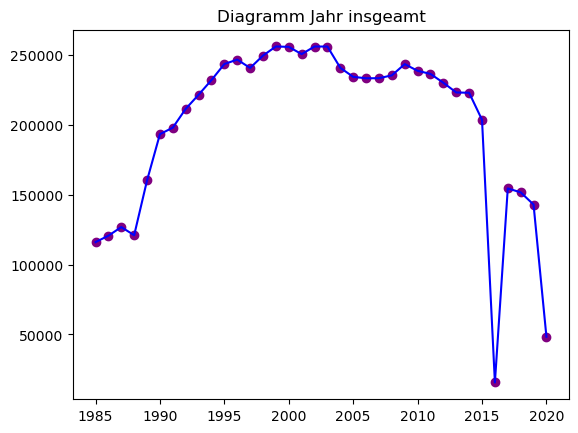

In [222]:
year_no = dataclean.groupby('year')['suicides_no'].sum().reset_index()
display(year_no)
plt.plot(year_no['year'], year_no['suicides_no'], color = 'blue')
plt.scatter(year_no['year'], year_no['suicides_no'],color = 'purple')
plt.title('Diagramm Jahr insgeamt')
plt.show()
# Jahr insgesamt  

,generation,suicides_no
0,Boomers,2369301.0
1,G.I. Generation,697049.0
2,Generation X,1612926.0
3,Generation Z,15906.0
4,Millenials,623459.0
5,Silent,1927294.0


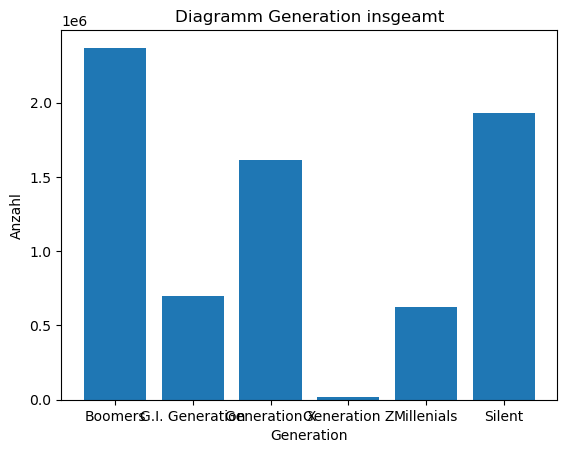

In [207]:
generation_no = dataclean.groupby('generation')['suicides_no'].sum().reset_index()
display(generation_no)
plt.bar(generation_no['generation'], generation_no['suicides_no'])
plt.title('Diagramm Generation insgeamt')
plt.xlabel('Generation')
plt.ylabel('Anzahl')
plt.show()
# Generationen insgeamt 

   gdp_for_year ($)  suicides_no
0        46919625.0         12.0
1        47515189.0         10.0
2        47737955.0          4.0
3        54832578.0         10.0
4        56338028.0          2.0
5        63101272.0          0.0
6        65334841.0          4.0
7        66515377.0          6.0
8        67254174.0          0.0
9        67537480.0          5.0


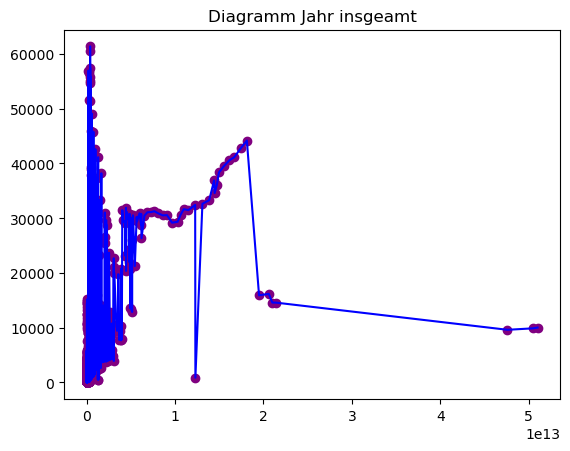

In [223]:
gdp_no = dataclean.groupby('gdp_for_year ($)')['suicides_no'].sum().reset_index()
print(gdp_no.head(10))
plt.plot(gdp_no['gdp_for_year ($)'], gdp_no['suicides_no'], color = 'blue')
plt.scatter(gdp_no['gdp_for_year ($)'], gdp_no['suicides_no'],color = 'purple')
plt.title('Diagramm Jahr insgeamt')
plt.show()
#GDP insgesamt 

,year,country,suicides_no
0,1985,Antigua and Barbuda,0.0
1,1985,Argentina,1988.0
2,1985,Australia,1861.0
3,1985,Austria,2091.0
4,1985,Bahamas,1.0
...,...,...,...
2544,2020,Serbia,895.0
2545,2020,Singapore,359.0
2546,2020,Slovenia,368.0
2547,2020,Spain,4369.0


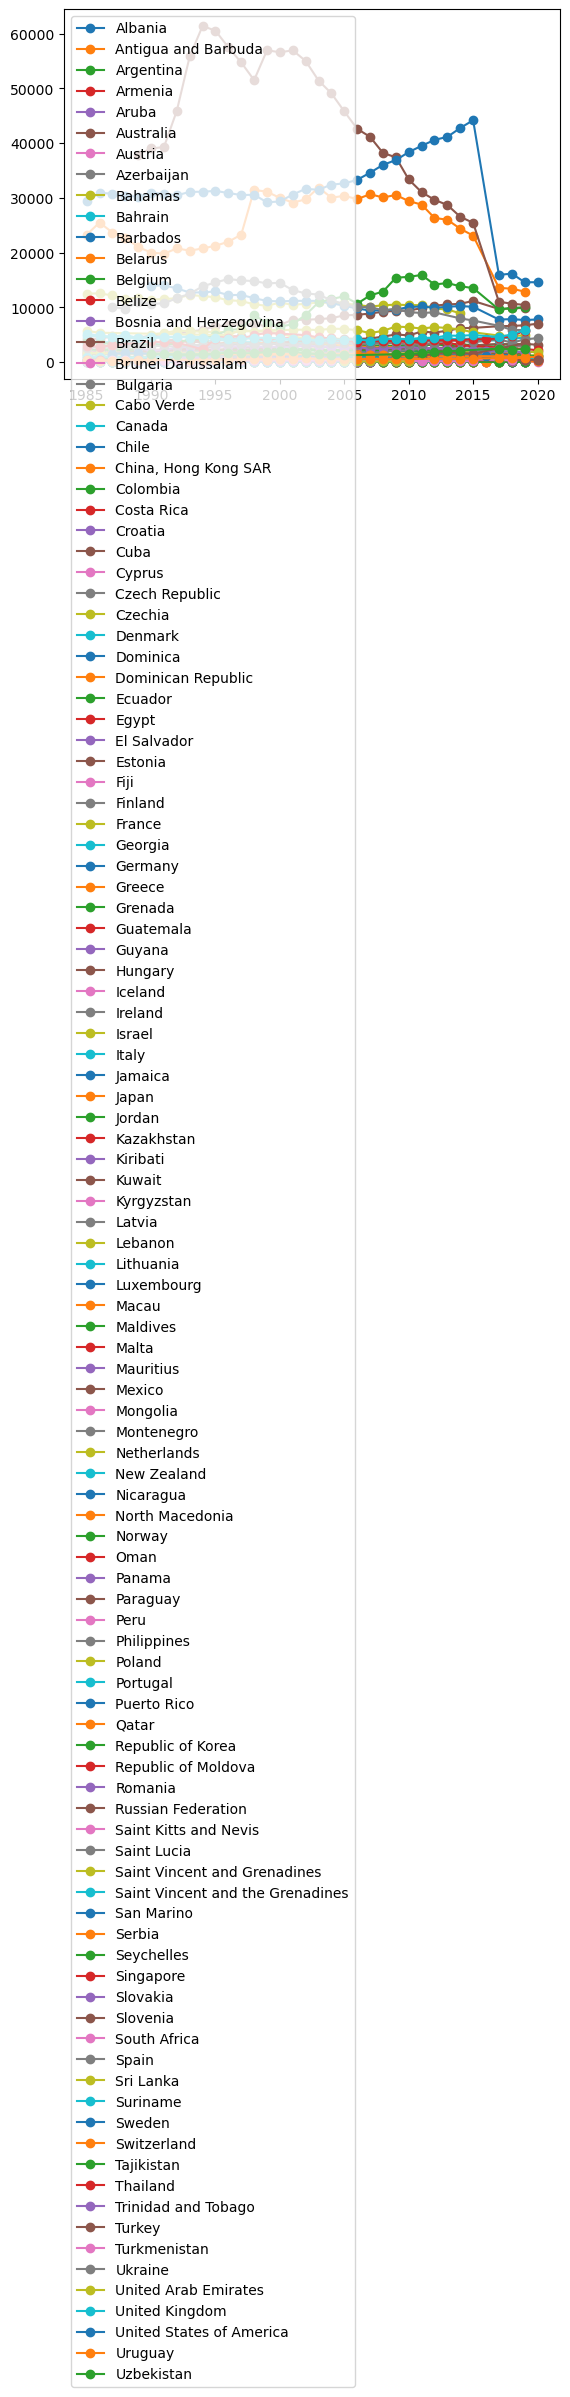

In [209]:
datahelp = dataclean.groupby(['year','country'])['suicides_no'].sum().reset_index()

display(datahelp)

for country, suicides in datahelp.groupby('country'):
    plt.plot(suicides['year'], suicides['suicides_no'], label=country, marker='o')

plt.legend()
plt.show()
#jährliche Entwicklung der Länder absolut

,year,country,suicides/100k pop
0,1985,Antigua and Barbuda,0.000000
1,1985,Argentina,134.470000
2,1985,Australia,163.410000
3,1985,Austria,384.810000
4,1985,Bahamas,4.760000
...,...,...,...
2544,2020,Serbia,12.972658
2545,2020,Singapore,6.313967
2546,2020,Slovenia,17.503647
2547,2020,Spain,9.223983


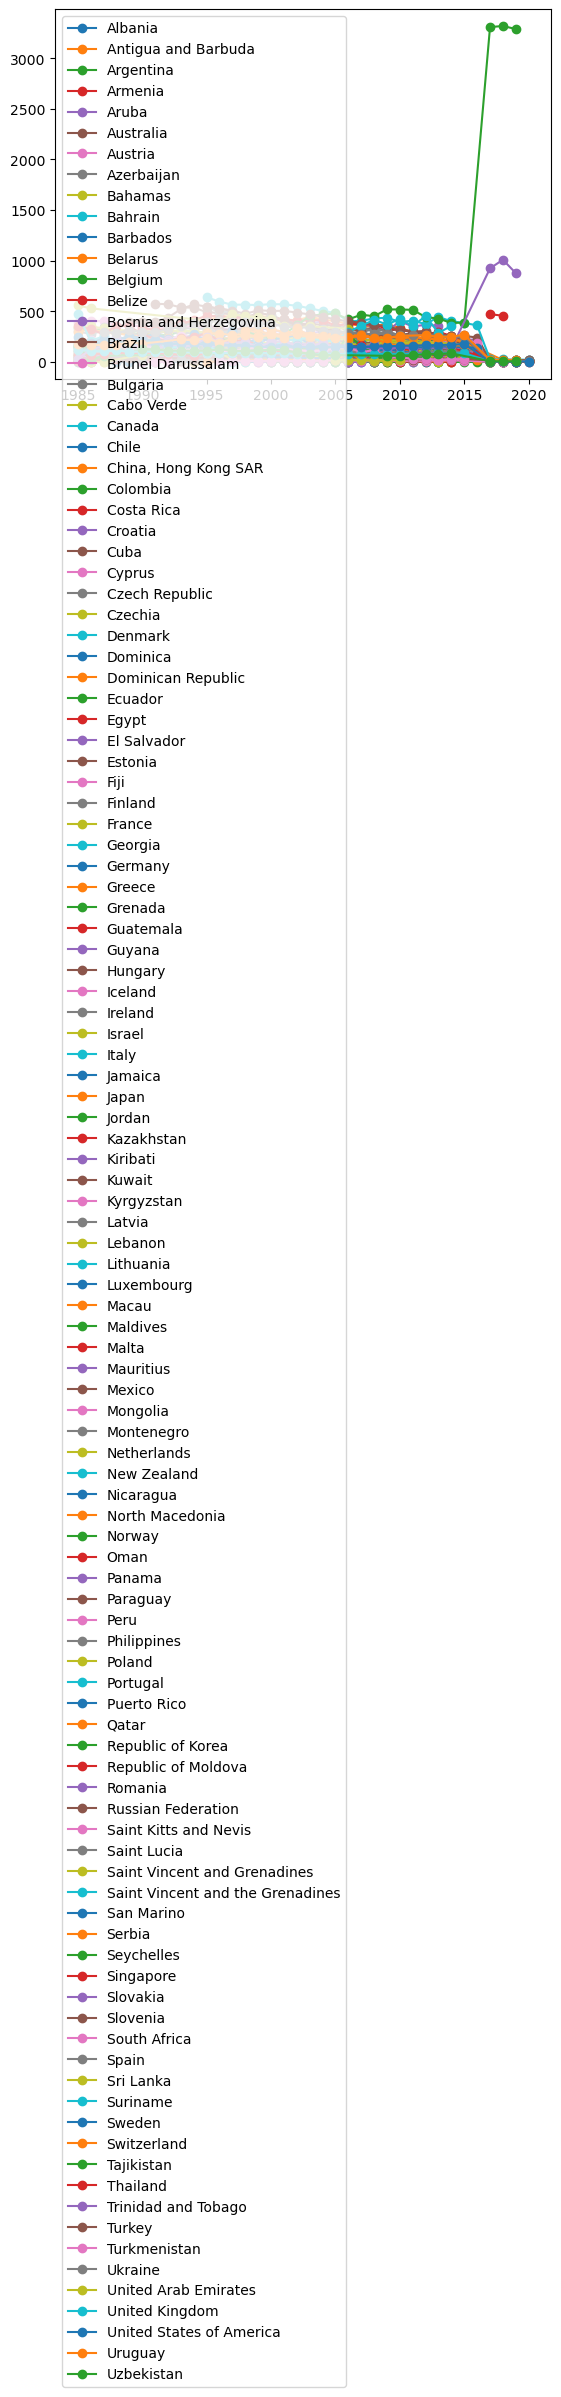

In [210]:
datahelp = dataclean.groupby(['year','country'])['suicides/100k pop'].sum().reset_index()

display(datahelp)

for country, suicides in datahelp.groupby('country'):
    plt.plot(suicides['year'], suicides['suicides/100k pop'], label=country, marker='o')

plt.legend()
plt.show()
#jährliche Entwicklung der Länder relativ 

,year,age,suicides_no
0,1985,15-24 years,17870.0
1,1985,25-34 years,20771.0
2,1985,35-54 years,35748.0
3,1985,5-14 years,984.0
4,1985,55-74 years,28736.0
...,...,...,...
210,2020,25-34 years,8183.0
211,2020,35-54 years,13567.0
212,2020,5-14 years,1125.0
213,2020,55-74 years,11231.0


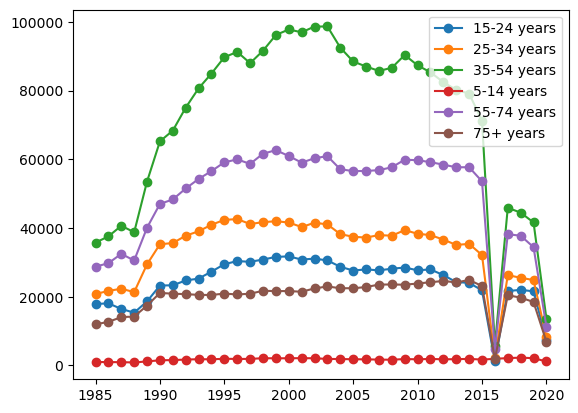

In [226]:
data = dataclean.groupby(['year','age'])['suicides_no'].sum().reset_index()

display(data)

for age, suicides in data.groupby('age'):
    plt.plot(suicides['year'], suicides['suicides_no'], label=age, marker='o')

plt.legend()
plt.show()
# jährliche Entwicklung Alter

In [212]:
yeargdp = dataclean.groupby(['gdp_for_year ($)','year']).suicides_no.sum()
display(yeargdp)
# jährliche Entwicklung GDP

gdp_for_year ($)  year
4.691962e+07      1993       12.0
4.751519e+07      1991       10.0
4.773796e+07      1992        4.0
5.483258e+07      1994       10.0
5.633803e+07      1995        2.0
                           ...   
2.100000e+13      2020    14577.0
2.140000e+13      2019    14569.0
4.760000e+13      2017     9600.0
5.050000e+13      2018     9867.0
5.100000e+13      2019    10010.0
Name: suicides_no, Length: 2548, dtype: float64

,year,sex,suicides_no
0,1985,female,32479.0
1,1985,male,83584.0
2,1986,female,33852.0
3,1986,male,86818.0
4,1987,female,35006.0
...,...,...,...
67,2018,male,106988.0
68,2019,female,40750.0
69,2019,male,102216.0
70,2020,female,14732.0


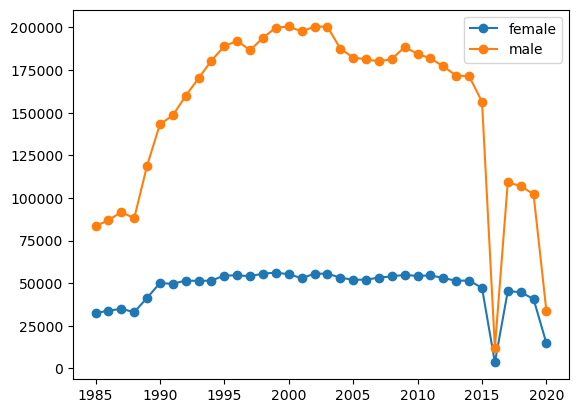

In [213]:
datahelp = dataclean.groupby(['year','sex'])['suicides_no'].sum().reset_index()

display(datahelp)

for sex, suicides in datahelp.groupby('sex'):
    plt.plot(suicides['year'], suicides['suicides_no'], label=sex, marker='o')

plt.legend()
plt.show()
#jährliche Entwicklung Geschlecht 

,year,generation,suicides_no
0,1985,Boomers,20771.0
1,1985,G.I. Generation,40690.0
2,1985,Generation X,18854.0
3,1985,Silent,35748.0
4,1986,Boomers,21685.0
...,...,...,...
157,2019,Silent,41615.0
158,2020,Boomers,8183.0
159,2020,G.I. Generation,18089.0
160,2020,Generation X,8490.0


<function matplotlib.pyplot.show(close=None, block=None)>

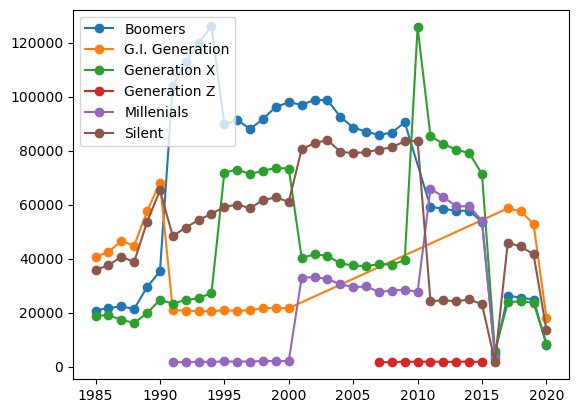

In [214]:
datahelp = dataclean.groupby(['year','generation'])['suicides_no'].sum().reset_index()

display(datahelp)

for generation, suicides in datahelp.groupby('generation'):
    plt.plot(suicides['year'], suicides['suicides_no'], label=generation, marker='o')

plt.legend()
plt.show
#jährliche Entwicklung Gerneration

In [215]:
hdi = pd.read_csv('HDR21-22_Statistical_Annex_HDI_Trends_Table.csv')
hdi = hdi.rename(columns = {'Country': 'country'})
# Einlesen der HDI Datei

In [216]:
merged_data = pd.merge(dataclean, hdi, on='country', how='inner')

def get_value(row):
    year = row['year']
    column = f'hdi_{year}'
               
    if column in merged_data.columns:
        return row[column]
    else:
        return None
               
merged_data['hdi'] = merged_data.apply(get_value, axis=1)
               
merged_data = merged_data[['year', 'country', 'sex', 'age', 'suicides_no', 'hdi']].dropna()
# inner Join von HDI und dataclean

In [217]:
display(merged_data)

,year,country,sex,age,suicides_no,hdi
132,2000,Albania,male,25-34 years,17.0,0.677
133,2000,Albania,male,55-74 years,10.0,0.677
134,2000,Albania,female,75+ years,2.0,0.677
135,2000,Albania,male,75+ years,1.0,0.677
136,2000,Albania,female,15-24 years,6.0,0.677
...,...,...,...,...,...,...
28376,2018,Peru,female,15-24 years,62.0,0.776
28378,2018,Peru,female,25-34 years,33.0,0.776
28380,2018,Peru,female,35-54 years,24.0,0.776
28382,2018,Peru,female,55-74 years,10.0,0.776


,year,hdi,suicides_no
0,1990,0.484,158.0
1,1990,0.509,89.0
2,1990,0.525,571.0
3,1990,0.576,3753.0
4,1990,0.593,3.0
...,...,...,...
350,2020,0.913,1440.0
351,2020,0.939,2183.0
352,2020,0.944,7766.0
353,2020,0.947,3139.0


<function matplotlib.pyplot.show(close=None, block=None)>

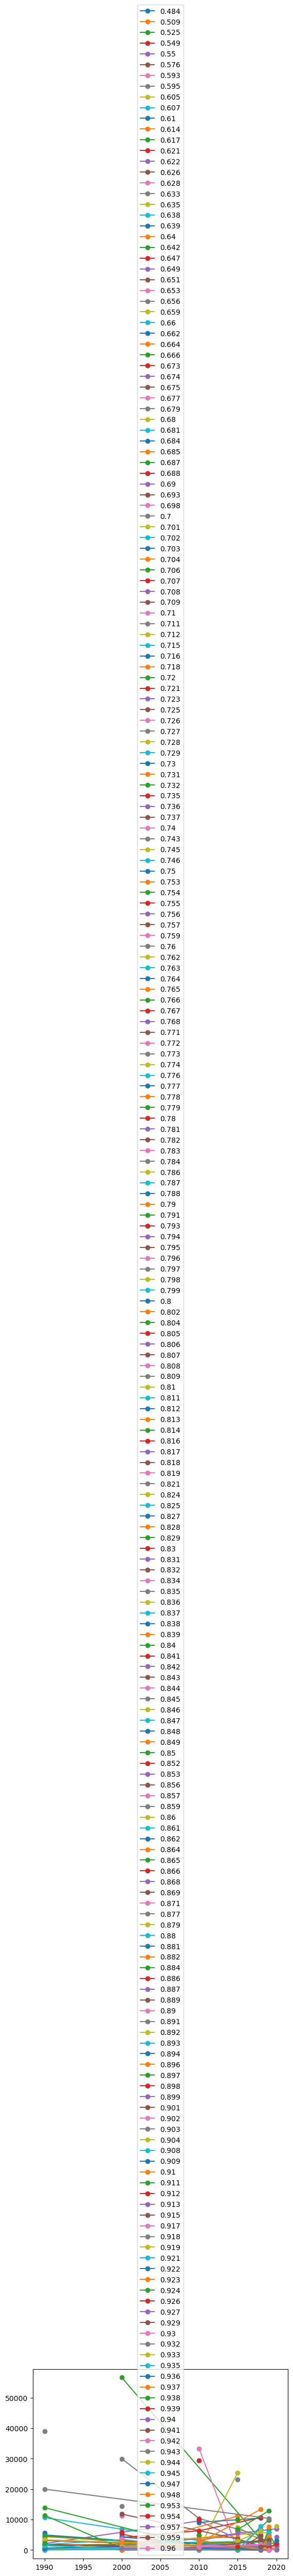

In [218]:
datahelp = merged_data.groupby(['year','hdi'])['suicides_no'].sum().reset_index()

display(datahelp)

for hdi, suicides in datahelp.groupby('hdi'):
    plt.plot(suicides['year'], suicides['suicides_no'], label=hdi, marker='o')

plt.legend()
plt.show
# Suizide in Abhänigkeit vom HDI

       Actual   Predicted
24141     6.0  242.921806
26864  4276.0  257.936653
22772    45.0  248.927745
25624     5.0  220.399536
21690     0.0  244.423291
...       ...         ...
12927   328.0  242.921806
22813    39.0  244.423291
20033    15.0  215.895082
5550     16.0  224.903990
27784   404.0  218.898051

[6112 rows x 2 columns]


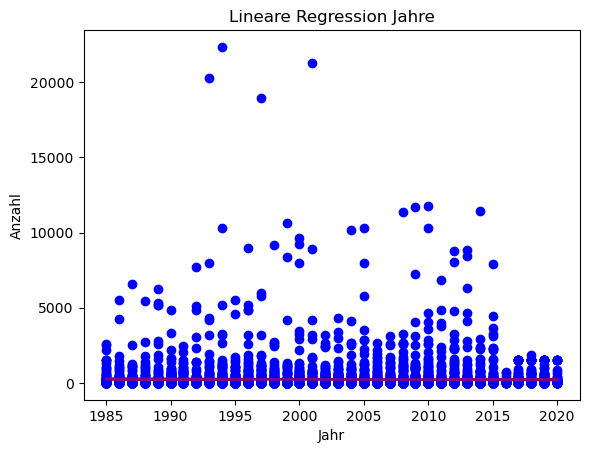

In [252]:
from sklearn.linear_model import LinearRegression
X = dataclean['year']
y = dataclean['suicides_no']
X_train, X_test, y_train, y_test = train_test_split(dataclean[['year']], dataclean['suicides_no'],test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, predictions, color='purple', linewidth=2)
plt.xlabel('Jahr')
plt.ylabel('Anzahl')
plt.title('Lineare Regression Jahre')
plt.show()
#Linerare Regression Jahr 

       Actual   Predicted
24141     6.0  352.753443
26864  4276.0  352.753443
22772    45.0  352.753443
25624     5.0  352.753443
21690     0.0  352.753443
...       ...         ...
12927   328.0  111.718018
22813    39.0  111.718018
20033    15.0  111.718018
5550     16.0  111.718018
27784   404.0  352.753443

[6112 rows x 2 columns]


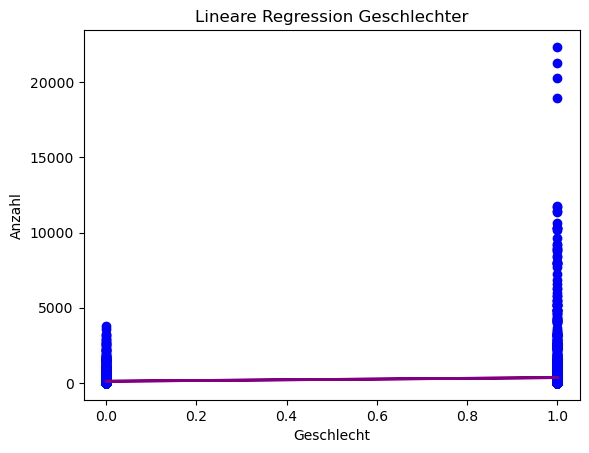

In [253]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
dataclean['sexEncoded'] = label.fit_transform(dataclean['sex'])

X = dataclean['sexEncoded']
y = dataclean['suicides_no']

X_train, X_test, y_train, y_test = train_test_split(dataclean[['sexEncoded']], dataclean['suicides_no'],test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, predictions, color='purple', linewidth=2)
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl')
plt.title('Lineare Regression Geschlechter')
plt.show()



       Actual   Predicted
24141     6.0  246.137827
26864  4276.0  255.041729
22772    45.0  210.522218
25624     5.0  210.522218
21690     0.0  228.330023
...       ...         ...
12927   328.0  237.233925
22813    39.0  219.426120
20033    15.0  237.233925
5550     16.0  228.330023
27784   404.0  237.233925

[6112 rows x 2 columns]


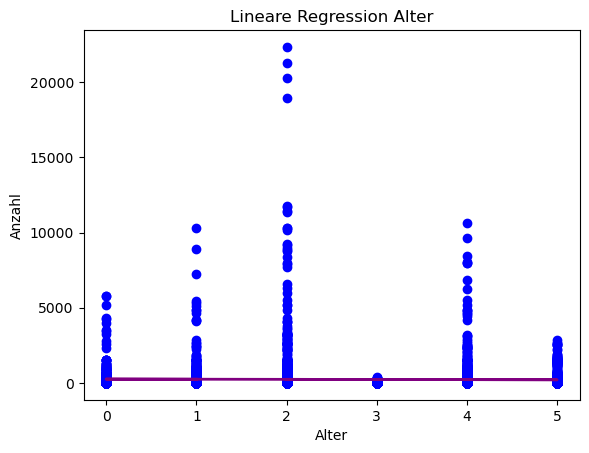

In [254]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
dataclean['ageEncoded'] = label.fit_transform(dataclean['age'])

X = dataclean['ageEncoded']
y = dataclean['suicides_no']

X_train, X_test, y_train, y_test = train_test_split(dataclean[['ageEncoded']], dataclean['suicides_no'],test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, predictions, color='purple', linewidth=2)
plt.xlabel('Alter')
plt.ylabel('Anzahl')
plt.title('Lineare Regression Alter')
plt.show()

       Actual   Predicted
24141     6.0  361.020947
26864  4276.0  393.356183
22772    45.0  346.323113
25624     5.0  375.718782
21690     0.0  328.685711
...       ...         ...
12927   328.0  214.042601
22813    39.0  346.323113
20033    15.0  305.169176
5550     16.0  128.795161
27784   404.0  399.235317

[6112 rows x 2 columns]


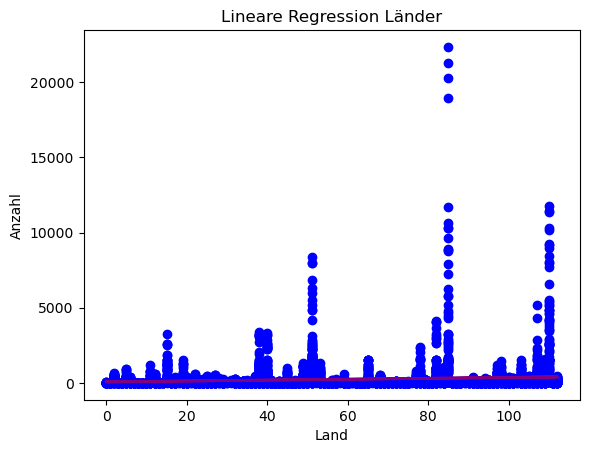

In [255]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
dataclean['countryEncoded'] = label.fit_transform(dataclean['country'])

X = dataclean['countryEncoded']
y = dataclean['suicides_no']

X_train, X_test, y_train, y_test = train_test_split(dataclean[['countryEncoded']], dataclean['suicides_no'],test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, predictions, color='purple', linewidth=2)
plt.xlabel('Land')
plt.ylabel('Anzahl')
plt.title('Lineare Regression Länder')
plt.show()

       Actual   Predicted
24141     6.0  248.465742
26864  4276.0  248.465742
22772    45.0  273.348175
25624     5.0  173.818442
21690     0.0  198.700875
...       ...         ...
12927   328.0  298.230608
22813    39.0  173.818442
20033    15.0  248.465742
5550     16.0  223.583309
27784   404.0  248.465742

[6112 rows x 2 columns]


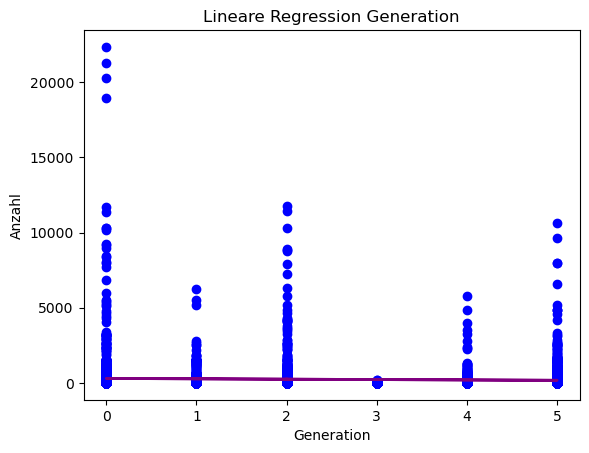

In [256]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
dataclean['generationEncoded'] = label.fit_transform(dataclean['generation'])

X = dataclean['generationEncoded']
y = dataclean['suicides_no']

X_train, X_test, y_train, y_test = train_test_split(dataclean[['generationEncoded']], dataclean['suicides_no'],test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, predictions, color='purple', linewidth=2)
plt.xlabel('Generation')
plt.ylabel('Anzahl')
plt.title('Lineare Regression Generation')
plt.show()

       Actual   Predicted
24141     6.0  173.240557
26864  4276.0  692.943311
22772    45.0  174.890573
25624     5.0  176.023192
21690     0.0  173.178883
...       ...         ...
12927   328.0  321.369411
22813    39.0  176.057169
20033    15.0  184.744306
5550     16.0  193.485793
27784   404.0  179.011497

[6112 rows x 2 columns]


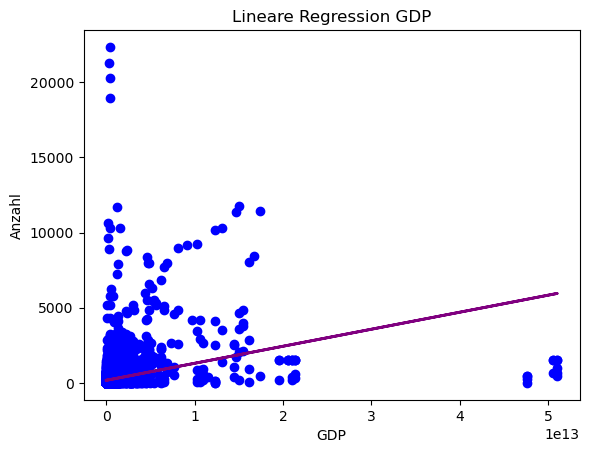

In [262]:
from sklearn.linear_model import LinearRegression
X = dataclean['gdp_for_year ($)']
y = dataclean['suicides_no']
X_train, X_test, y_train, y_test = train_test_split(dataclean[['gdp_for_year ($)']], dataclean['suicides_no'],test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, predictions, color='purple', linewidth=2)
plt.xlabel('GDP')
plt.ylabel('Anzahl')
plt.title('Lineare Regression GDP')
plt.show()
#Linerare Regression Jahr 

       Actual   Predicted
13788     0.0  157.852359
20189   180.0  160.859013
16171     0.0  194.533537
13286    14.0  231.515381
22728     0.0  199.344184
...       ...         ...
5794    200.0  215.580115
9475   1088.0  211.972130
15744     0.0  218.586769
12731   138.0  212.874127
14293  1495.0  236.025362

[972 rows x 2 columns]


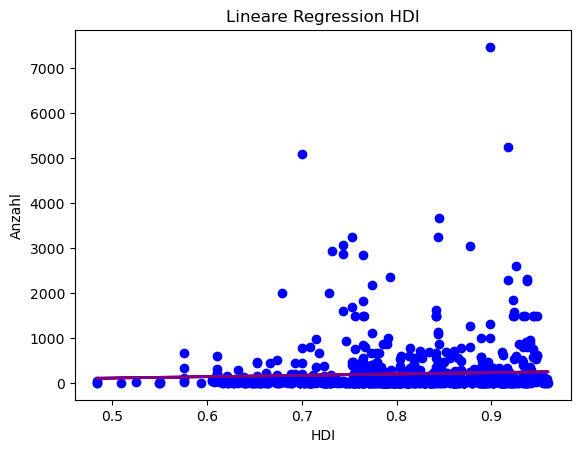

In [263]:
from sklearn.linear_model import LinearRegression
X = merged_data['hdi']
y = merged_data['suicides_no']
X_train, X_test, y_train, y_test = train_test_split(merged_data[['hdi']], merged_data['suicides_no'],test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, predictions, color='purple', linewidth=2)
plt.xlabel('HDI')
plt.ylabel('Anzahl')
plt.title('Lineare Regression HDI')
plt.show()
#Linerare Regression Jahr 

       Actual  Predicted
13788   0.664   0.758690
20189   0.674   0.802718
16171   0.786   0.714662
13286   0.909   0.824732
22728   0.802   0.842343
...       ...        ...
5794    0.856   0.837940
9475    0.844   0.758690
15744   0.866   0.837940
12731   0.847   0.758690
14293   0.924   0.842343

[972 rows x 2 columns]


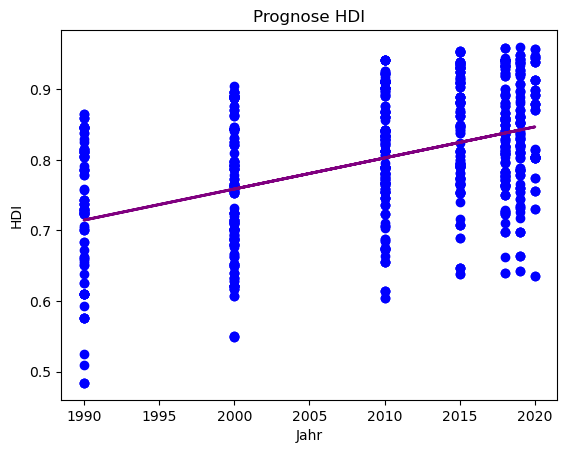

In [267]:
from sklearn.linear_model import LinearRegression
X = merged_data['year']
y = merged_data['hdi']
X_train, X_test, y_train, y_test = train_test_split(merged_data[['year']], merged_data['hdi'],test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, predictions, color='purple', linewidth=2)
plt.xlabel('Jahr')
plt.ylabel('HDI')
plt.title('Prognose HDI')
plt.show()
#Prognose HDI 

             Actual     Predicted
24141  8.606309e+08  3.494665e+11
26864  4.590155e+12  8.878139e+10
22772  1.543129e+10  2.451925e+11
25624  2.543301e+10  7.404943e+11
21690  3.160085e+08  3.233980e+11
...             ...           ...
12927  1.308929e+12  3.494665e+11
22813  2.573304e+10  3.233980e+11
20033  1.024458e+11  8.186998e+11
5550   1.796385e+11  6.622887e+11
27784  5.182157e+10  7.665628e+11

[6112 rows x 2 columns]


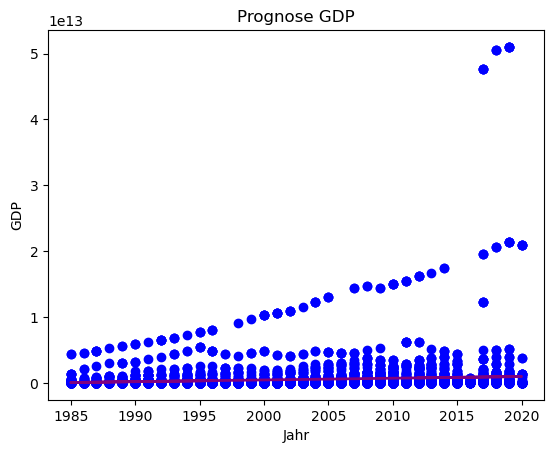

In [268]:
from sklearn.linear_model import LinearRegression
X = dataclean['year']
y = dataclean['gdp_for_year ($)']
X_train, X_test, y_train, y_test = train_test_split(dataclean[['year']], dataclean['gdp_for_year ($)'],test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, predictions, color='purple', linewidth=2)
plt.xlabel('Jahr')
plt.ylabel('GDP')
plt.title('Prognose GDP')
plt.show()
#Prognose GDP 

In [272]:
def custom_grouping (value):
    if str(value).startswith('0.9'):
        return 'Group_0.9'
    else: 
        return 'Other_Group'
dataclean['Group'] = dataclean['gdp_for_year ($)'].apply(custom_grouping)

# Gruppierung nach der erstellten 'Group'-Spalte
grouped_dataclean = dataclean.groupby('Group')['gdp_for_year ($)'].mean()

# Ausgabe der gruppierten Daten
print(grouped_dataclean)

Group
Other_Group    5.437237e+11
Name: gdp_for_year ($), dtype: float64


In [278]:
def custom_rename(value):
    if 0.4 <= value < 0.5:
        return 'Group_0.4'
    elif 0.5 <= value < 0.6:
        return 'Group_0.5'
    elif 0.6 <= value < 0.7:
        return 'Group_0.6'
    elif 0.7 <= value < 0.8:
        return 'Group_0.7'
    elif 0.8 <= value < 0.9:
        return 'Group_0.8'
    elif 0.9 <= value < 1.0:
        return 'Group_0.9'
    else:
        return 'Other_Value'


merged_data['Renamed_Values'] = merged_data['hdi'].apply(custom_rename)


print(merged_data)

       year  country     sex          age  suicides_no    hdi Renamed_Values
132    2000  Albania    male  25-34 years         17.0  0.677      Group_0.6
133    2000  Albania    male  55-74 years         10.0  0.677      Group_0.6
134    2000  Albania  female    75+ years          2.0  0.677      Group_0.6
135    2000  Albania    male    75+ years          1.0  0.677      Group_0.6
136    2000  Albania  female  15-24 years          6.0  0.677      Group_0.6
...     ...      ...     ...          ...          ...    ...            ...
28376  2018     Peru  female  15-24 years         62.0  0.776      Group_0.7
28378  2018     Peru  female  25-34 years         33.0  0.776      Group_0.7
28380  2018     Peru  female  35-54 years         24.0  0.776      Group_0.7
28382  2018     Peru  female  55-74 years         10.0  0.776      Group_0.7
28384  2018     Peru  female    75+ years          2.0  0.776      Group_0.7

[4860 rows x 7 columns]


,year,Renamed_Values,suicides_no
0,1990,Group_0.4,158.0
1,1990,Group_0.5,4515.0
2,1990,Group_0.6,13657.0
3,1990,Group_0.7,80967.0
4,1990,Group_0.8,53456.0
5,2000,Group_0.5,182.0
6,2000,Group_0.6,32968.0
7,2000,Group_0.7,101905.0
8,2000,Group_0.8,80911.0
9,2000,Group_0.9,1672.0


<function matplotlib.pyplot.show(close=None, block=None)>

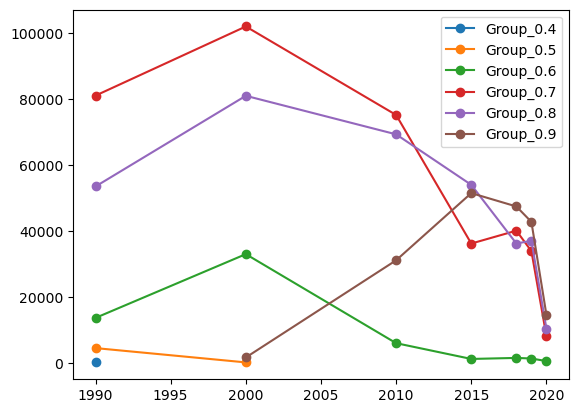

In [279]:
datahelp = merged_data.groupby(['year','Renamed_Values'])['suicides_no'].sum().reset_index()

display(datahelp)

for hdi, suicides in datahelp.groupby('Renamed_Values'):
    plt.plot(suicides['year'], suicides['suicides_no'], label=hdi, marker='o')

plt.legend()
plt.show
# Suizide in Abhänigkeit vom HDI

In [281]:
def custom_rename(value):
    if 4.691962e+07 <= value < 5e+07:
        return 'Group_4e+07'
    elif 0.5e+07 <= value < 0.5e+08:
        return 'Group_5e+07'
    elif 0.5e+08 <= value < 0.5e+09:
        return 'Group_5e+08'
    elif 0.5e+09 <= value < 0.5e+10:
        return 'Group_5e+09'
    elif 0.5e+10 <= value < 0.5e+11:
        return 'Group_5e+10'
    elif 0.5e+11 <= value < 0.5e+12:
        return 'Group_5e+11'
    elif 0.5e+12 <= value < 5.100000e+13:
        return 'Group_5e+12'
    else:
        return 'Other_Value'


dataclean['GDP_neu'] = dataclean['gdp_for_year ($)'].apply(custom_rename)


print(dataclean)


                        country  year     sex          age  suicides_no  \
0                       Albania  1987    male  15-24 years         21.0   
1                       Albania  1987    male  35-54 years         16.0   
2                       Albania  1987  female  15-24 years         14.0   
3                       Albania  1987    male    75+ years          1.0   
4                       Albania  1987    male  25-34 years          9.0   
...                         ...   ...     ...          ...          ...   
31751                   Ukraine  2017  female    75+ years        256.0   
31752            United Kingdom  2017  female    75+ years        104.0   
31753  United States of America  2017  female    75+ years        501.0   
31754                   Uruguay  2017  female    75+ years         14.0   
31755                Uzbekistan  2017  female    75+ years          3.0   

       population  suicides/100k pop  gdp_for_year ($)       generation  \
0          312900       

,year,GDP_neu,suicides_no
0,1985,Group_5e+08,11.0
1,1985,Group_5e+09,778.0
2,1985,Group_5e+10,15114.0
3,1985,Group_5e+11,34956.0
4,1985,Group_5e+12,65204.0
...,...,...,...
161,2019,Group_5e+12,95671.0
162,2019,Other_Value,10010.0
163,2020,Group_5e+10,997.0
164,2020,Group_5e+11,8666.0


<function matplotlib.pyplot.show(close=None, block=None)>

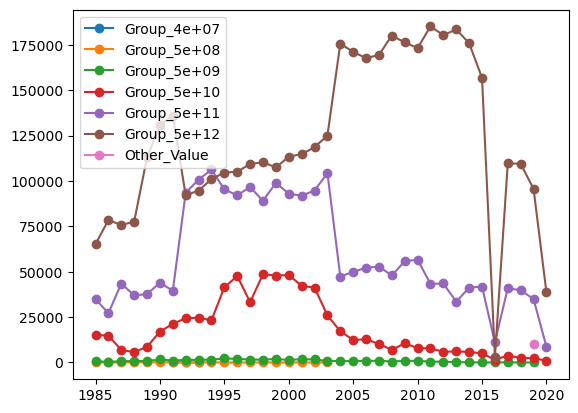

In [284]:
datahelp = dataclean.groupby(['year','GDP_neu'])['suicides_no'].sum().reset_index()

display(datahelp)

for hdi, suicides in datahelp.groupby('GDP_neu'):
    plt.plot(suicides['year'], suicides['suicides_no'], label=hdi, marker='o')

plt.legend()
plt.show
# Suizide in Abhänigkeit vom HDI

       GDP_neu  suicides_no
0  Group_4e+07         26.0
1  Group_5e+08        800.0
2  Group_5e+09      32585.0
3  Group_5e+10     657734.0
4  Group_5e+11    2121130.0
5  Group_5e+12    4423650.0
6  Other_Value      10010.0


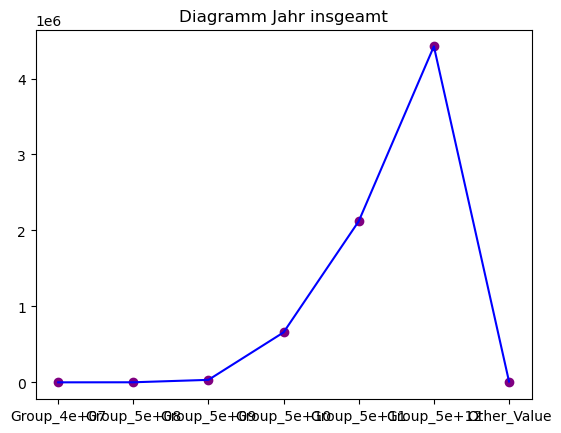

In [285]:
gdp_no = dataclean.groupby('GDP_neu')['suicides_no'].sum().reset_index()
print(gdp_no.head(10))
plt.plot(gdp_no['GDP_neu'], gdp_no['suicides_no'], color = 'blue')
plt.scatter(gdp_no['GDP_neu'], gdp_no['suicides_no'],color = 'purple')
plt.title('Diagramm Jahr insgeamt')
plt.show()
#GDP insgesamt 